# Esse notebook é para prever o consumo de cerveja em São Paulo 

Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

Descrição:

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).


In [ ]:
#importando bibliotecas

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dados = pd.read_csv('Consumo_cerveja.csv')

In [ ]:
dados.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
dados.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [ ]:
#renomeando colunas 
renomear = {'Temperatura Media (C)': 'temp_media', 'Temperatura Minima (C)': 'temp_min',
       'Temperatura Maxima (C)': 'temp_max', 'Precipitacao (mm)': 'chuva', 'Final de Semana': 'fds',
        'Consumo de cerveja (litros)': 'consumo_de_cerveja'}

In [ ]:
dados.rename(columns=renomear, inplace=True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                365 non-null    object 
 1   temp_media          365 non-null    object 
 2   temp_min            365 non-null    object 
 3   temp_max            365 non-null    object 
 4   chuva               365 non-null    object 
 5   fds                 365 non-null    float64
 6   consumo_de_cerveja  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [ ]:
# Eliminando as linhas com valores nulos 
dados.dropna(how = 'all', inplace = True)

In [ ]:
# Substituindo a vírgula por ponto (formato inglês)
dados.replace({',':'.'}, regex = True, inplace = True)

In [ ]:
#convertendo o tipo de Data
dados['Data'] = pd.to_datetime(dados['Data'])

In [ ]:
dias = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']

dados['Dia_da_semana'] = dados['Data'].apply(lambda a: dias[a.weekday()])

In [ ]:
dados.head()

,Data,temp_media,temp_min,temp_max,chuva,fds,consumo_de_cerveja,Dia_da_semana
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,Quinta
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,Sexta
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,Sabado
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Domingo
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,Segunda


In [ ]:
dados.shape

(365, 8)

# Análises descritiva

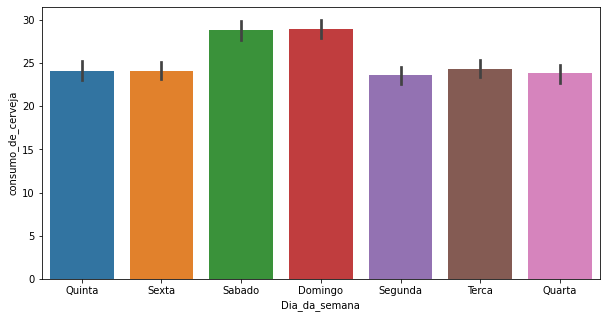

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x="Dia_da_semana", y="consumo_de_cerveja", data=dados)

Perceba que os dias da semana não importam muito para análise, apenas nos fds (sábado e domingo) que há uma diferença no consumo para o resto da semana.

In [ ]:
#eliminando as colunas "Data" e "Dia_da_semana"
dados.drop(['Data','Dia_da_semana'], axis = 1, inplace = True)

In [ ]:
#mudando os tipos da colunas 

dados  = dados.apply(pd.to_numeric)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temp_media          365 non-null    float64
 1   temp_min            365 non-null    float64
 2   temp_max            365 non-null    float64
 3   chuva               365 non-null    float64
 4   fds                 365 non-null    float64
 5   consumo_de_cerveja  365 non-null    float64
dtypes: float64(6)
memory usage: 30.0 KB


In [ ]:
dados.describe().round(2)  

,temp_media,temp_min,temp_max,chuva,fds,consumo_de_cerveja
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


In [ ]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo_de_cerveja
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo_de_cerveja,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Perceba que as variáveis de temperatura possuem uma relação linear boa com a variável dependente consumo.

Podemos interpretar também que a variável chuva é inversamente proporcional a nossa variável dependente, desta forma, quando chove, a tendência é que o consumo de cerveja diminua, por isso o valor negativo. Já em no caso de fds, como anteriormente observado, verificamos que o consumo se eleva.

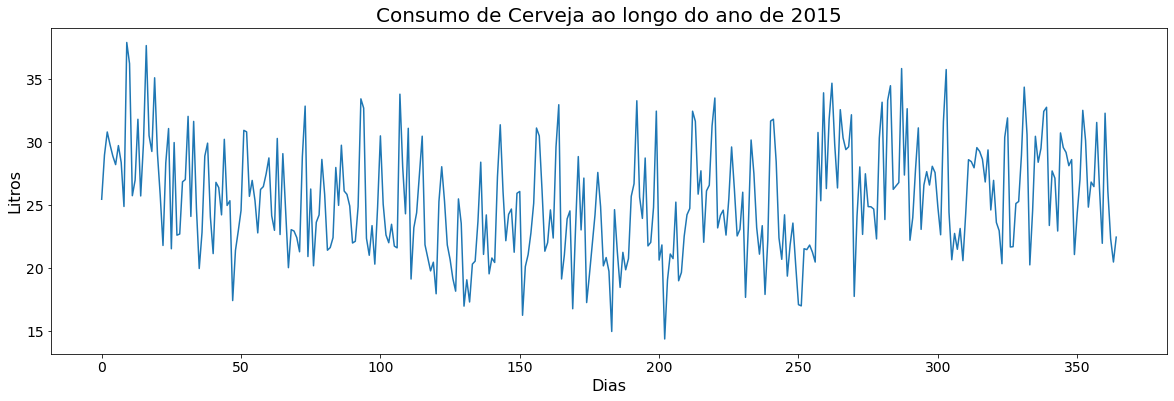

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))  

ax.set_title('Consumo de Cerveja ao longo do ano de 2015', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo_de_cerveja'].plot(fontsize=14) 

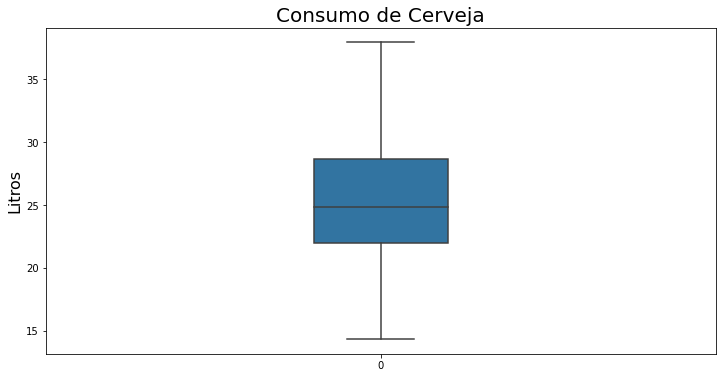

In [ ]:
ax = sns.boxplot(data=dados['consumo_de_cerveja'], orient='v', width=0.2) 
ax.figure.set_size_inches(12, 6) #tamanho do boxplot
ax.set_title('Consumo de Cerveja', fontsize=20) 
ax.set_ylabel('Litros', fontsize=16)
ax = ax 

**Consumo X Fds**

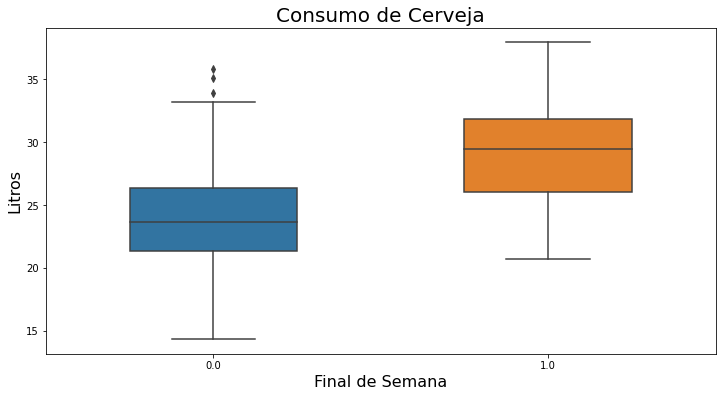

In [ ]:
ax = sns.boxplot(y='consumo_de_cerveja', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax = ax

Podemos perceber visivelmente que o consumo cai quando não estamos em um fim de semana (0). Essas discrepancias em dias que não são fds podem ser feriados.

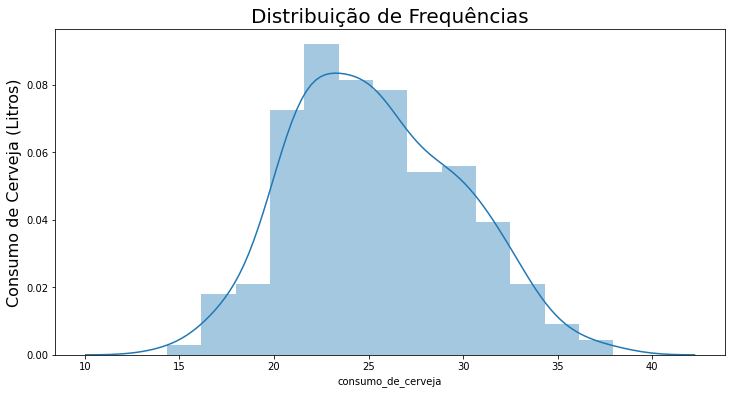

In [ ]:
ax = sns.distplot(dados['consumo_de_cerveja'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax

In [ ]:
dados.consumo_de_cerveja.describe()

count    365.000000
mean      25.401367
std        4.399143
min       14.343000
25%       22.008000
50%       24.867000
75%       28.631000
max       37.937000
Name: consumo_de_cerveja, dtype: float64

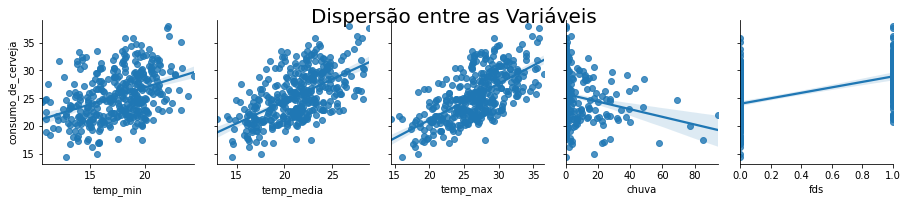

In [ ]:
ax = sns.pairplot(dados, y_vars='consumo_de_cerveja', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg') 
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax 

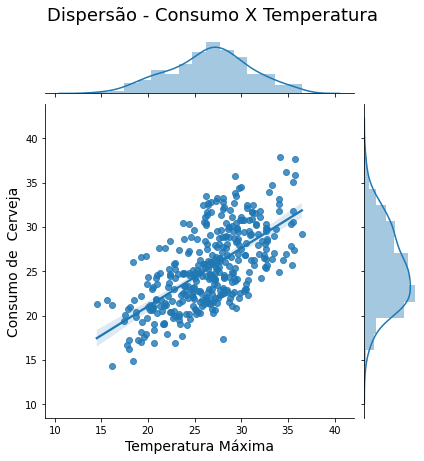

In [ ]:
ax = sns.jointplot(x="temp_max", y="consumo_de_cerveja", data=dados, kind='reg') #colocando a reta 
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

# Estimando um Modelo de Regressão Linear para o Consumo

In [ ]:
import statsmodels.api as sm

In [ ]:
dados.columns

Index(['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds',
       'consumo_de_cerveja'],
      dtype='object')

In [ ]:
X = dados[['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds']]
y = dados['consumo_de_cerveja']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [ ]:
X_train_com_constante = sm.add_constant(X_train) #criando uma variavel constante
#dentro tem um conjunto de variaveis explicativas de treino (feita le em cima)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:     consumo_de_cerveja   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     138.3
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           9.62e-70
Time:                        11:08:06   Log-Likelihood:                -574.30
No. Observations:                 255   AIC:                             1161.
Df Residuals:                     249   BIC:                             1182.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3627      1.011      6.291      0.0

Nota-se que o parâmetro temp_min e temp_media não passan no teste, ele não explica nada da nossa variavel dependente y, visto que  P>|t| é superior a 0.05, devendo assim não fazer parte do modelo.

In [ ]:
X = dados[['temp_max', 'chuva', 'fds']]
y = dados['consumo_de_cerveja']

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import (
    BayesianRidge,
    SGDRegressor,
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [ ]:
def run_reg_linear(X_train, X_test, y_train, y_test, model, plot=False):
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, test_pred)
    mae = mean_absolute_error(y_test, test_pred)
    r2 = r2_score(y_test, test_pred)

    if plot:
        print("*" * 40)
        print("r2 score", r2)
        print("mse", mse)
        print("mae", mae)
        print("*" * 40)

    return r2, mse

# BayesianRidge

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

tol = [round(x/1000000.,5) for x in np.linspace(start=0, stop=100000, num=2000)]
alpha_1 = [round(x/100000.,4) for x in np.linspace(start=0, stop=100000, num=2000)]
alpha_2 = [round(x/100000.,4) for x in np.linspace(start=0, stop=100000, num=2000)]
lambda_1 = [round(x/100000.,4) for x in np.linspace(start=0, stop=100000, num=2000)]
lambda_2 = [round(x/100000.,4) for x in np.linspace(start=0, stop=100000, num=2000)]
fit_intercept = [True,False]
normalize = [True,False]
n_iter = [10000]
    
random_grid = {
    "tol": tol,
    "alpha_1": alpha_1,
    "alpha_2": alpha_2,
    "lambda_1": lambda_1,
    "lambda_2": lambda_2,   
    "fit_intercept": fit_intercept,  
    "normalize": normalize,
    'n_iter':n_iter}


br = BayesianRidge()
br_random = RandomizedSearchCV(
    estimator=br,
    param_distributions=random_grid,
    n_iter=2000,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)

br_random.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4106 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   42.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=2000, n_jobs=-1,
                   param_distributions={'alpha_1': [0.0, 0.0005, 0.001, 0.00...
                                        'normalize': [True, False],
                                        'tol': [0.0, 5e-05, 0.0001, 0.00015,
                                                0.0002, 0.00025, 0.0003,
                                                0.00035, 0.0004, 0.00045,
                 

In [ ]:
melhores_parametros = br_random.best_params_
print(melhores_parametros)

score= run_reg_linear(X_train, X_test, y_train, y_test, BayesianRidge(
    tol=melhores_parametros['tol'],
    alpha_1= melhores_parametros['alpha_1'],
    alpha_2= melhores_parametros['alpha_2'],
    lambda_1= melhores_parametros['lambda_1'],
    lambda_2= melhores_parametros['lambda_2'],   
    fit_intercept= melhores_parametros['fit_intercept'],  
    normalize= melhores_parametros['normalize'],
    n_iter=melhores_parametros['n_iter']
), True)

{'tol': 0.04842, 'normalize': True, 'n_iter': 10000, 'lambda_2': 0.9755, 'lambda_1': 0.4952, 'fit_intercept': True, 'alpha_2': 0.8569, 'alpha_1': 0.8849}
****************************************
r2 score 0.6917090486883517
mse 5.454767930190288
mae 1.96339897676459
****************************************


# Random Forest

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=1, stop=1000, num=100)]

max_features = ["auto", "sqrt"]

max_depth = [int(x) for x in np.linspace(1, 1100, num=110)]
max_depth.append(None)

min_samples_split = [2, 5, 10, 15, 20,25,30]

min_samples_leaf = [1, 2, 4,6,8,10]

bootstrap = [True, False]

random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap}


rf = RandomForestRegressor(n_jobs=-1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=500,
    cv=4,
    verbose=2,
    random_state=42,
    n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 19.9min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [ ]:
melhores_parametros = rf_random.best_params_
print(melhores_parametros)
score= run_reg_linear(X_train, X_test, y_train, y_test, RandomForestRegressor(
    n_estimators=melhores_parametros['n_estimators'],
    max_features= melhores_parametros['max_features'],
    max_depth= melhores_parametros['max_depth'],
    min_samples_split= melhores_parametros['min_samples_split'],
    min_samples_leaf= melhores_parametros['min_samples_leaf'],   
    bootstrap= melhores_parametros['bootstrap']), True)

{'n_estimators': 162, 'min_samples_split': 25, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 989, 'bootstrap': True}
****************************************
r2 score 0.6555025109958088
mse 6.095390886615822
mae 2.0548918400280654
****************************************


# Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
lr = LinearRegression() 

In [ ]:
lr.fit(X_train, y_train)   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
score= run_reg_linear(X_train, X_test, y_train, y_test, LinearRegression(), True)

****************************************
r2 score 0.6907364667750691
mse 5.471976377624393
mae 1.9665560392257604
****************************************


Desta feita, a Regressão Linear apresentou o melhor desempenho, sendo assim, ficaremos com esse modelo.

In [ ]:
#variáveis do modelo
index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana'] #visando fazer um dataframe com os valores 

In [ ]:
lr.coef_

array([ 0.68473676, -0.06078244,  5.40108334])

In [ ]:
pd.DataFrame(data=np.append(lr.intercept_, lr.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5.951976
Temperatura Máxima,0.684737
Chuva (mm),-0.060782
Final de Semana,5.401083


In [ ]:
MSE = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
MAE = metrics.mean_absolute_error(y_test, y_previsto)
R2 = metrics.r2_score(y_test, y_previsto).round(2)



pd.DataFrame([EQM, REQM, MAE, R2], ['EQM', 'REQM', 'MAE', 'R²'], columns=['Métricas'])

,Métricas
EQM,5.470000
REQM,2.340000
MAE,1.966556
R²,0.690000


# Fazendo previsão

In [ ]:
temp_max=40
chuva=12.2
fds=0
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

32.60 litros


# Salvando modelo estimado

In [ ]:
import pickle

In [ ]:
output = open('modelo_consumo_cerveja', 'wb') 
pickle.dump(modelo, output)
output.close() 

In [ ]:
import pickle

modelo = open('modelo_consumo_cerveja','rb') #indico onde tá o meu modelo(pasta)
lr_cerveja = pickle.load(modelo) 
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lr_cerveja.predict(entrada)[0])) 

26.09 litros


# Criando um simulador 

In [ ]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display


style = {'description_width': '150px'}
style1 = {'description_width': '210px'}
style2 = {'description_width': '230px'}
layout = {'width': '400px'}

# Criando os controles do formulário 
temp_max = widgets.Text(description="Temperatura Máxima", style=style, layout=layout)
chuva = widgets.Text(description="Chuva", style=style, layout=layout)
fds = widgets.RadioButtons(options=[('Não', 0), ('Sim', 1)], description="Fim de Semana", style=style, layout=layout)


botao = widgets.Button(description="Simular") #criando o botão chamado simular

# Posicionando 
inputs = VBox([temp_max, chuva, fds]) 


# Função de simulação
def simulador(sender):
    entrada=[[
                float(temp_max.value if temp_max.value else 0), 
                float(chuva.value if chuva.value else 0), 
                float(fds.value if fds.value else 0)]]


    print('{0:.2f} litros'.format(lr_cerveja.predict(entrada)[0])) 
    
# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador)    

In [ ]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())